Welcome to Sephire Data Exploration!
Analysis started: 2025-09-26 10:13:05.867203
Connected to Sephire API!
Fetched top tracks data
Fetched user stats data
Data fetched: ['top_tracks', 'user_stats']
Tracks DataFrame: 50 rows

TRACKS DATA:
Shape: (50, 7)
Columns: ['name', 'artist', 'album', 'popularity', 'duration_ms', 'preview_url', 'spotify_url']
Sample data:
                               name                        artist  \
0                             NOKIA                         Drake   
1  Pursuit Of Happiness (Nightmare)       Kid Cudi, MGMT, Ratatat   
2      Big Shot (with Travis Scott)  Kendrick Lamar, Travis Scott   

                                               album  popularity  duration_ms  \
0                                $ome $exy $ongs 4 U          86       241023   
1    Man On The Moon: The End Of Day (Int'l Version)          71       295293   
2  Black Panther The Album Music From And Inspire...          60       221826   

  preview_url                      

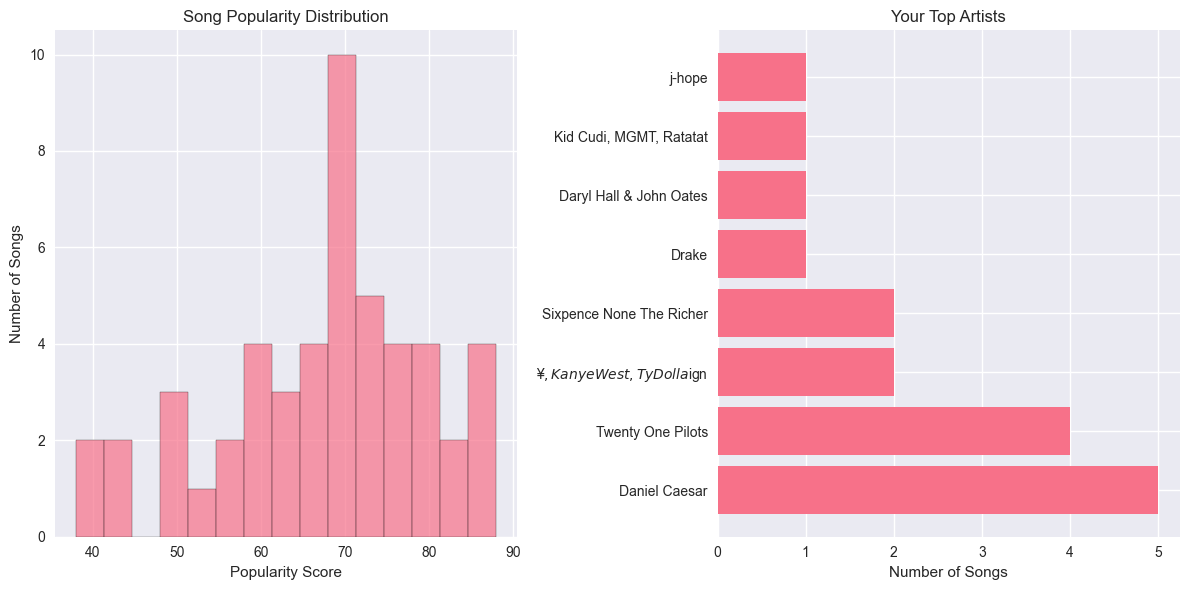

Created data directories
Saved tracks data to ../data/processed/tracks_data.csv
Saved tracks data to ../data/processed/tracks_data.json

 Data exploration complete!
Next steps:
1. Explore more features in your data
2. Create additional visualizations
3. Start building predictive models
4. Integrate ML models back into your FastAPI


In [1]:
# Cell 1: Setup and Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from datetime import datetime
import warnings
import os
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Welcome to Sephire Data Exploration!")
print(f"Analysis started: {datetime.now()}")

# Cell 2: Connect to Your FastAPI
# Make sure your FastAPI server is running (python main.py)
API_BASE_URL = "http://127.0.0.1:8000"

def check_api_connection():
    """Check if your FastAPI is running"""
    try:
        response = requests.get(f"{API_BASE_URL}/health")
        if response.status_code == 200:
            print("Connected to Sephire API!")
            return True
        else:
            print("API connection failed")
            return False
    except:
        print("FastAPI not running. Please start with: python main.py")
        return False

# Test connection
api_connected = check_api_connection()

# Cell 3: Fetch Your Spotify Data
def get_spotify_data():
    """Fetch data from your FastAPI endpoints"""
    data = {}

    if not api_connected:
        print("Using sample data since API is not connected")
        # Sample data for testing (replace with your actual structure)
        return {
            'top_tracks': [
                {'name': 'Sample Song', 'artist': 'Sample Artist', 'popularity': 75},
                {'name': 'Another Song', 'artist': 'Another Artist', 'popularity': 82}
            ],
            'user_stats': {'total_tracks': 50, 'avg_popularity': 78.5}
        }

    try:
        # Fetch top tracks (adjust endpoints to match your API)
        tracks_response = requests.get(f"{API_BASE_URL}/top-tracks?limit=50")
        if tracks_response.status_code == 200:
            data['top_tracks'] = tracks_response.json()
            print("Fetched top tracks data")

        # Fetch user stats
        stats_response = requests.get(f"{API_BASE_URL}/my-stats")
        if stats_response.status_code == 200:
            data['user_stats'] = stats_response.json()
            print("Fetched user stats data")

    except Exception as e:
        print(f"Error fetching data: {e}")

    return data

# Get the data
spotify_data = get_spotify_data()
print(f"Data fetched: {list(spotify_data.keys())}")

# Cell 4: Convert to DataFrames for Analysis
def create_dataframes(data):
    """Convert API responses to pandas DataFrames"""
    dfs = {}

    # Create tracks DataFrame
    if 'top_tracks' in data and 'tracks' in data['top_tracks']:
        dfs['tracks'] = pd.DataFrame(data['top_tracks']['tracks'])
        print(f"Tracks DataFrame: {len(dfs['tracks'])} rows")

    # Add more DataFrame conversions as needed
    # Example for genres data:
    # if 'user_stats' in data and 'top_genres' in data['user_stats']:
    #     genres_data = data['user_stats']['top_genres']
    #     dfs['genres'] = pd.DataFrame(list(genres_data.items()),
    #                                  columns=['genre', 'count'])

    return dfs

# Create DataFrames
dataframes = create_dataframes(spotify_data)

# Display basic info about your data
for name, df in dataframes.items():
    print(f"\n{name.upper()} DATA:")
    print(f"Shape: {df.shape}")
    if not df.empty:
        print("Columns:", list(df.columns))
        print("Sample data:")
        print(df.head(3))

# Cell 5: Basic Data Exploration
def explore_tracks_data(df):
    """Basic exploration of tracks data"""
    if df.empty:
        print("No tracks data available")
        return

    print("TRACKS ANALYSIS")
    print("="*50)

    # Basic statistics
    if 'popularity' in df.columns:
        print(f"Average popularity: {df['popularity'].mean():.1f}")
        print(f"Most popular song: {df.loc[df['popularity'].idxmax(), 'name']}")
        print(f"Least popular song: {df.loc[df['popularity'].idxmin(), 'name']}")

    # Top artists
    if 'artist' in df.columns:
        print(f"\nTop 5 Artists:")
        top_artists = df['artist'].value_counts().head()
        for artist, count in top_artists.items():
            print(f"  {artist}: {count} songs")

# Explore your data
if 'tracks' in dataframes:
    explore_tracks_data(dataframes['tracks'])

# Cell 6: Create Your First Visualization
def create_popularity_chart(df):
    """Create a popularity distribution chart"""
    if df.empty or 'popularity' not in df.columns:
        print("No popularity data available for visualization")
        return

    plt.figure(figsize=(12, 6))

    # Subplot 1: Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df['popularity'], bins=15, edgecolor='black', alpha=0.7)
    plt.title('Song Popularity Distribution')
    plt.xlabel('Popularity Score')
    plt.ylabel('Number of Songs')

    # Subplot 2: Top artists
    if 'artist' in df.columns:
        plt.subplot(1, 2, 2)
        top_artists = df['artist'].value_counts().head(8)
        plt.barh(range(len(top_artists)), top_artists.values)
        plt.yticks(range(len(top_artists)), top_artists.index)
        plt.title('Your Top Artists')
        plt.xlabel('Number of Songs')

    plt.tight_layout()
    plt.show()

# Create visualization
if 'tracks' in dataframes:
    create_popularity_chart(dataframes['tracks'])

# Cell 7: Save Data for Future Use
def save_data_for_ml(dataframes):
    """Save processed data for machine learning experiments"""

    # Create directories relative to parent folder (go up from notebooks/)
    os.makedirs('../data/processed', exist_ok=True)
    os.makedirs('../data/raw', exist_ok=True)
    print("Created data directories")

    for name, df in dataframes.items():
        if not df.empty:
            # Save as CSV (go up one level with ../)
            filepath = f"../data/processed/{name}_data.csv"
            df.to_csv(filepath, index=False)
            print(f"Saved {name} data to {filepath}")

            # Save as JSON for backup
            json_path = f"../data/processed/{name}_data.json"
            df.to_json(json_path, orient='records', indent=2)
            print(f"Saved {name} data to {json_path}")

# Save your data
save_data_for_ml(dataframes)

print("\n Data exploration complete!")
print("Next steps:")
print("1. Explore more features in your data")
print("2. Create additional visualizations")
print("3. Start building predictive models")
print("4. Integrate ML models back into your FastAPI")